In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
from sklearn import svm

/Users/arp504/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

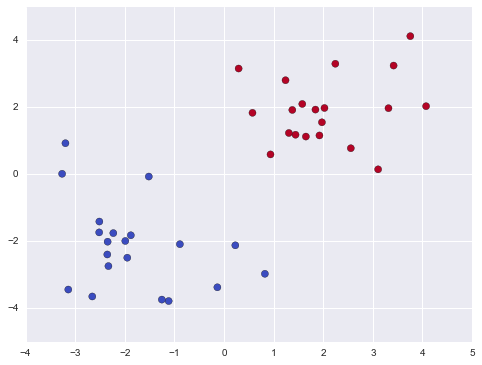

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

In [3]:
# 1
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=100000.
clf = svm.SVC(kernel='linear',C=100000) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0, kernel='linear', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [4]:
#(a)
# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-4, 5)
#To have the Hyperplane centered:
b_down = clf.support_vectors_[0]
b_up = clf.support_vectors_[-1]
intercept_ = (b_up[1] - a * b_up[0] + b_down[1] - a * b_down[0])/2
x2 = a * x1 + intercept_

print "x2 = %s * x1  %s" % (a, intercept_)

x2 = -1.17689316087 * x1  -0.0768583071186


In [5]:
#(b)
#dist_marg = intercept_ - (b_down[1] - a * b_down[0])
dist_marg = b_up[1] - a * b_up[0] - intercept_
margin = abs(dist_marg / np.sqrt(1 + a**2))
print "margin: ",margin

margin:  1.14930350398


In [6]:
#(c)
# plot the parallels to the separating hyperplane that go through the
# support vectors
intercept_up_ = (b_up[1] - a * b_up[0])
intercept_down_ = (b_down[1] - a * b_down[0])
x2_down = a * x1 + intercept_down_
x2_up = a * x1 + intercept_up_

print "Support Vectors"
print pd.DataFrame(clf.support_vectors_)
print "Upper Margin: x2 = %s * x1 +%s" % (a, intercept_up_)
print "Lower Margin: x2 = %s * x1 %s" % (a, intercept_down_)

Support Vectors
          0         1
0  0.226275 -2.118110
1 -1.518036 -0.063994
2  0.935646  0.596936
Upper Margin: x2 = -1.17689316087 * x1 +1.69809110446
Lower Margin: x2 = -1.17689316087 * x1 -1.8518077187


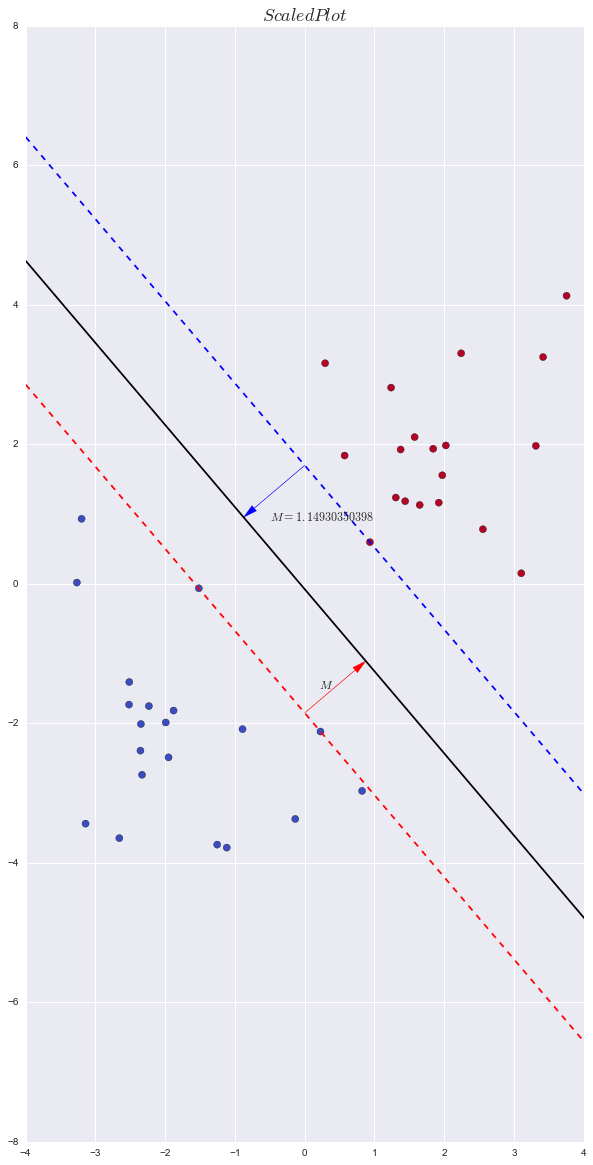

In [7]:
#2
fig = plt.figure(figsize=(10,20))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'r--')
plt.plot(x1, x2_up, 'b--')
plt.axis('tight')
plt.xlim(-4,4)
plt.ylim(-8,8)
plt.arrow(0,  intercept_up_, (margin-0.2) * a / np.sqrt(1 + a**2), -((margin-0.2) ) / np.sqrt(1 + a**2), fc="b", ec="b", head_width=0.1, head_length=0.2);
plt.annotate(r"$M=%s$" % margin, xy=(-0.5, 0.9), fontsize=12)
plt.arrow(0, intercept_down_, -(margin-0.2) * a / np.sqrt(1 + a**2), ((margin-0.2) ) / np.sqrt(1 + a**2), fc="r", ec="r", head_width=0.1, head_length=0.2);
plt.annotate(r"$M$", xy=(0.2, -1.5), fontsize=12)
plt.title(r"$Scaled Plot$",fontsize=18);

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


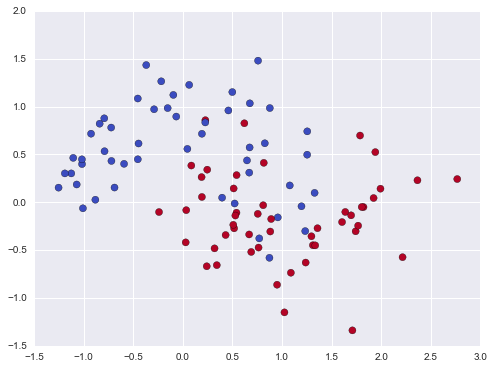

In [8]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

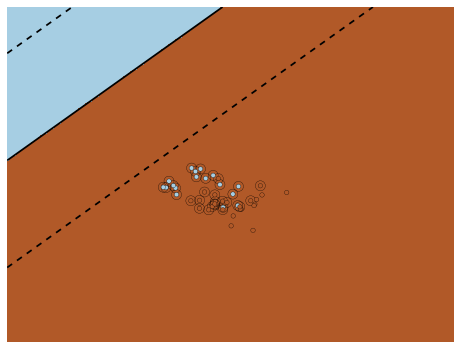

we successfully predict the 0.613636363636 percent of the training data
we successfully predict the 0.434782608696 percent of the validation data


In [9]:
#(1)
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=0.01.

clf = svm.SVC(kernel='linear',C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 
clf.fit(X_train_1, Y_train_1)
#clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=10) # plot support vectors with small circle
plt.scatter(X_train_1.iloc[:,0], X_train_1.iloc[:,1], c=Y_train_1, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6 #X.x1.min()
x_max = 8 #X.x1.max()
y_min = -6 #X.x2.min()
y_max = 8 #X.x2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(-6, 8)
plt.ylim(-6, 8)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of the training data".format(1.*(clf.predict(X_train_1) == Y_train_1).sum()/Y_train_1.shape[0])
print "we successfully predict the {} percent of the validation data".format(1.*(clf.predict(X_vali) == Y_vali).sum()/Y_vali.shape[0])


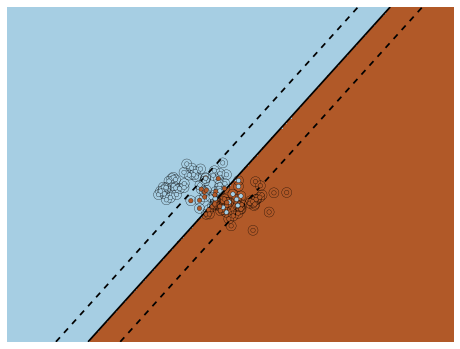

we successfully predict the 0.79 percent of the training data


In [10]:
#But for the records, trying with all the data set:
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=0.01.

clf = svm.SVC(kernel='linear',C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 
clf.fit(X, Y)
#clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=10) # plot support vectors with small circle
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6 #X.x1.min()
x_max = 8 #X.x1.max()
y_min = -6 #X.x2.min()
y_max = 8 #X.x2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(-6, 8)
plt.ylim(-6, 8)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of the training data".format(1.*(clf.predict(X) == Y).sum()/Y.shape[0])

/Users/arp504/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


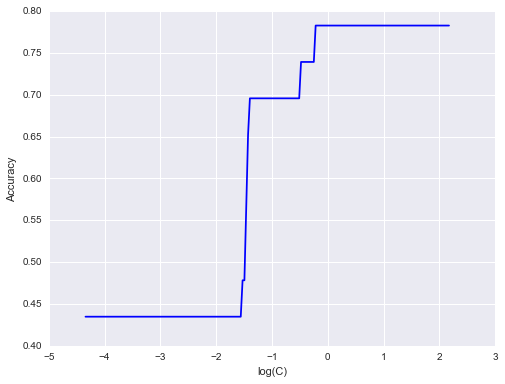

The optimal C we found is:9.83976826817 and the corresponding accuracy is:0.782608695652


In [11]:
#(2)
import math
OS_validation = []
C = [math.exp(i) for i in np.linspace(-10,5,200)]
for c in C:
    clf = svm.SVC(kernel='linear',C=c)
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
    
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C] #for a better graph
plt.plot(C,OS_validation,'b',)
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show();

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.



In [12]:
#(3)
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
print "we successfully predict the {} percent of the test data".format(1.*(clf.predict(X_test) == Y_test).sum()/Y_test.shape[0])

we successfully predict the 0.818181818182 percent of the test data


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


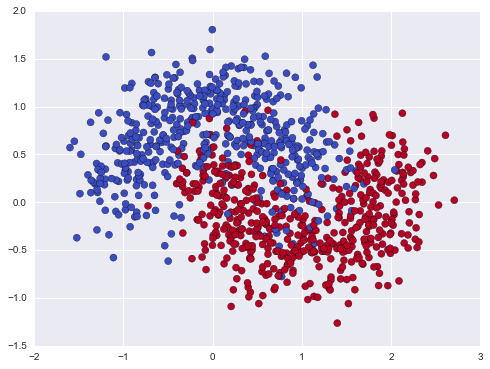

In [13]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

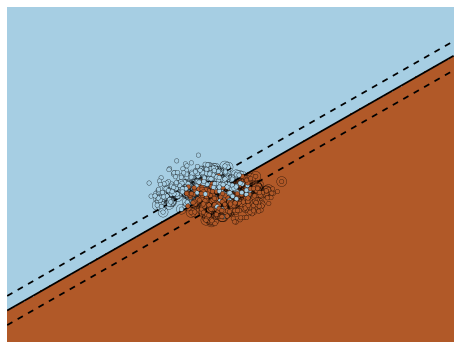

we successfully predict the 0.8125 percent of the training data
we successfully predict the 0.797297297297 percent of the validation data


In [14]:
#(1)
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=0.01.

clf = svm.SVC(kernel='linear',C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 
clf.fit(X_train_1, Y_train_1)
#clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=10) # plot support vectors with small circle
plt.scatter(X_train_1.iloc[:,0], X_train_1.iloc[:,1], c=Y_train_1, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6 #X.x1.min()
x_max = 8 #X.x1.max()
y_min = -6 #X.x2.min()
y_max = 8 #X.x2.max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(-6, 8)
plt.ylim(-6, 8)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of the training data".format(1.*(clf.predict(X_train_1) == Y_train_1).sum()/Y_train_1.shape[0])
print "we successfully predict the {} percent of the validation data".format(1.*(clf.predict(X_vali) == Y_vali).sum()/Y_vali.shape[0])



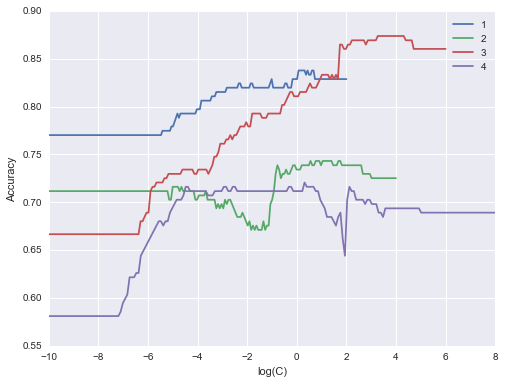

The optimal C we found is:46.0232051301 and the corresponding accuracy is:0.873873873874, in degree 3


In [15]:
#(2)
import math
OS_validation = [None,[],[],[],[]] #To index 4
C_opt = []
Acc_opt = []
for deg in [1,2,3,4]:
    C = [math.exp(i) for i in np.linspace(-10, 2 * deg ,200)]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=deg)
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation[deg].append(right)
    
    temp=pd.DataFrame([C,OS_validation[deg]]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
    C_opt.append(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0])
    Acc_opt.append(temp.iloc[:,1].max())

    C=np.linspace(-10, 2 * deg ,200) #for a better graph
    plt.plot(C,OS_validation[deg],label=deg)

plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.show();


print("The optimal C we found is:{} and the corresponding accuracy is:{}, in degree {}".format(max(C_opt),max(Acc_opt),C_opt.index(max(C_opt)) + 1)) # I choose the biggest one.



In [16]:
clf = svm.SVC(kernel='poly',C=max(C_opt),degree=3)
clf.fit(X_train, Y_train)
print "we successfully predict the {} percent of the test data".format(1.*(clf.predict(X_test) == Y_test).sum()/Y_test.shape[0])

we successfully predict the 0.881818181818 percent of the test data
